In [3]:
import math
import numpy as np
import blocks as blk
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, lfilter

import matplotlib as mpl
mpl.rcParams['axes.grid'] = True
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.size'] = 16

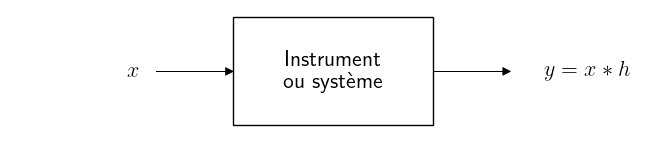

In [4]:
fig, ax = blk.drawing(8.4, 1.6, debug=False)

y = .8

blk.label(ax, 1.6, y   , "$x$")
blk.arrow(ax, 1.9, y   , 1.0, 0)
blk.block(ax, 2.9, y-.7, 2.6, 1.4, "Instrument\nou système")
blk.arrow(ax, 5.5, y   , 1.0, 0)
blk.label(ax, 7.5, y   , "$y = x*h$")

blk.saving(ax, "convolution.svg")

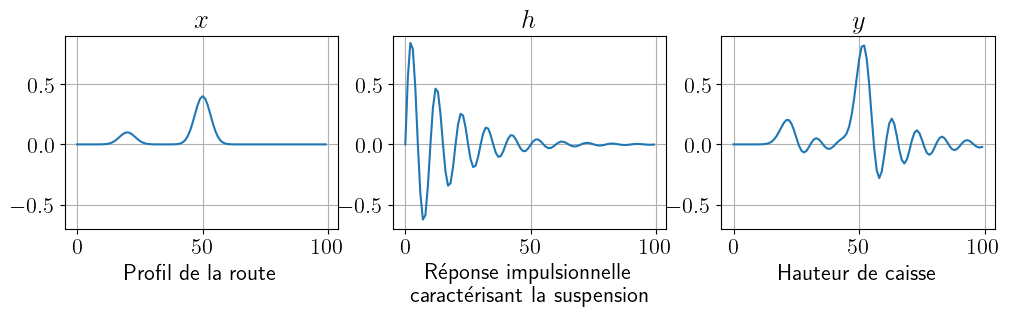

In [5]:
# Suspension de voiture

N = 100
n = np.arange(0, N)
x = 1*np.exp(-(n-20)**2/20) + 4*np.exp(-(n-50)**2/20)
x = x/10
h1 = np.exp(-0.06*n)
h2 = np.sin(2*math.pi*n/10)
h = np.multiply(h1, h2)
y = np.convolve(x, h, mode="full")
y = y[0:N]
ylim = [-.7, .9]

fig = plt.figure(figsize=(12,2.5))
plt.subplot(1,3,1)
plt.plot(n,x)
plt.title('$x$')
plt.xlabel('Profil de la route')
plt.ylim(ylim)
plt.subplot(1,3,2)
plt.plot(n,h)
plt.title('$h$')
plt.xlabel('Réponse impulsionnelle\ncaractérisant la suspension')
plt.ylim(ylim)
plt.subplot(1,3,3)
plt.plot(n,y)
plt.title('$y$')
plt.xlabel('Hauteur de caisse')
plt.ylim(ylim)

plt.savefig("suspension.svg", bbox_inches="tight")
plt.show()

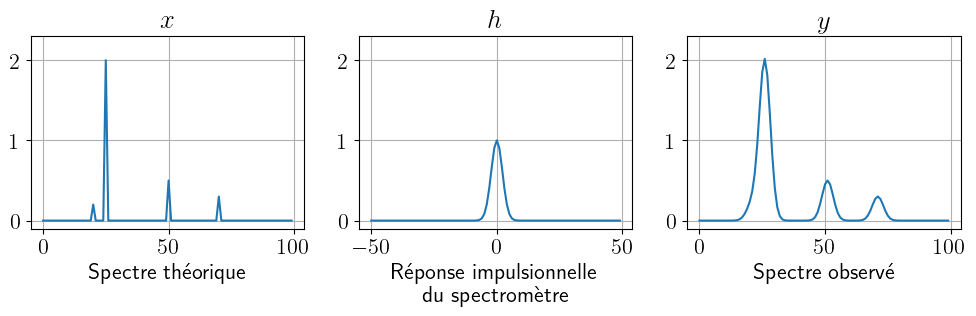

In [6]:
# Spectre chimique

N = 100
n = np.arange(0, N)
x = np.zeros(N)
x[20] = 0.2
x[25] = 2
x[50] = 0.5
x[70] = 0.3
h = np.exp(-(n-50)**2/10);
y = np.convolve(x, h, mode="same")
ylim = [-.1, 2.3]
# import math
fig = plt.figure(figsize=(12,2.5))
plt.subplot(1,3,1)
plt.plot(n,x)
plt.title('$x$')
plt.xlabel('Spectre théorique')
plt.ylim(ylim)
plt.subplot(1,3,2)
plt.plot(n-N/2,h)
plt.title('$h$')
plt.xlabel('Réponse impulsionnelle\ndu spectromètre')
plt.ylim(ylim)
plt.subplot(1,3,3)
plt.plot(n,y)
plt.title('$y$')
plt.xlabel('Spectre observé')
plt.ylim(ylim)

plt.savefig("spectre-chimique.svg", bbox_inches="tight")
plt.show()

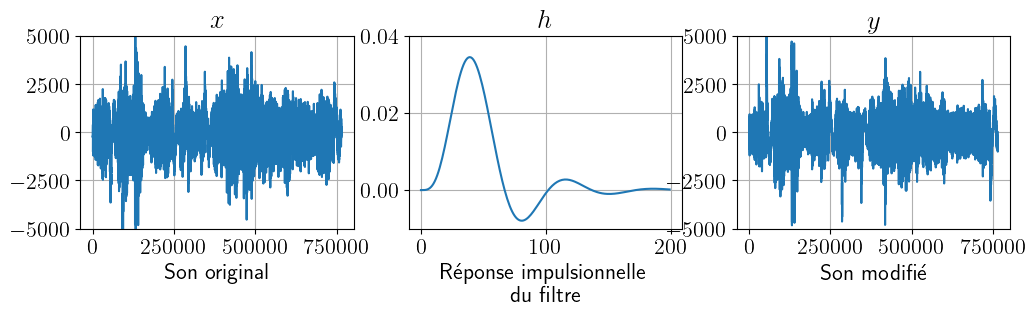

In [7]:
#Effet sonore

# Chargement du son
fe, x = wavfile.read('../src/Elise.wav')

# Signaux
N = len(x)
n = np.arange(0, N)
delta = np.zeros(x.shape)
delta[1000] = 1
[num, den] = butter(5, .03)
h = lfilter(num, den, delta)
y = lfilter(num, den, x)

# Sous-échantillonnage pour l'affichage
D = 100
n2 = n[0::D]
x2 = x[0::D]
h2 = h[0::D]
y2 = y[0::D]

# Affichage
ylim = [-5000, 5000]
fig = plt.figure(figsize=(12,2.5))
plt.subplot(1,3,1)
plt.plot(n2,x2)
plt.title('$x$')
plt.xlabel('Son original')
plt.ylim(ylim)
plt.subplot(1,3,2)
plt.plot(h[1000:1200])
plt.title('$h$')
plt.xlabel('Réponse impulsionnelle\ndu filtre')
plt.ylim([-.01, .04])
plt.subplot(1,3,3)
plt.plot(n2,y2)
plt.title('$y$')
plt.xlabel('Son modifié')
plt.ylim(ylim)

plt.savefig("effet-sonore.svg", bbox_inches="tight")
plt.show()